In [1]:
# !git clone https://github.com/ultralytics/yolov5

In [3]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [5]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\RHM1983/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-4-10 Python-3.10.9 torch-2.0.0+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [9]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [10]:
image = cv2.imread('20230213_152941.jpeg')

In [11]:
result = model(image)
result.print()

image 1/1: 3468x4624 1 cup, 1 dining table
Speed: 26.0ms pre-process, 169.2ms inference, 8.0ms NMS per image at shape (1, 3, 480, 640)


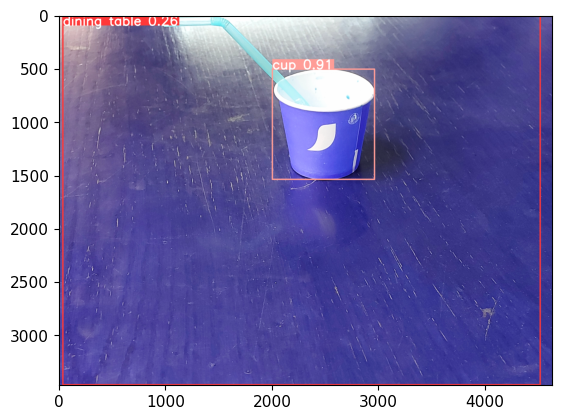

In [12]:
%matplotlib inline 
plt.imshow(np.squeeze(result.render()))
plt.show()

In [45]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

!cd yolov5 && python train.py --img 320 --batch 16 --epochs 1 --data dataset.yml --weights yolov5s.pt --workers 2

In [14]:
model01 = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp/weights/best.pt')

Using cache found in C:\Users\RHM1983/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-4-10 Python-3.10.9 torch-2.0.0+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7045186 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [34]:
image = cv2.imread('jdjfh.jpg', cv2.IMREAD_UNCHANGED)

In [35]:
result = model01(image)
result.print()

image 1/1: 2048x1536 1 garbage-tissue, 2 garbage-sprites
Speed: 3.0ms pre-process, 144.1ms inference, 1.0ms NMS per image at shape (1, 3, 640, 480)


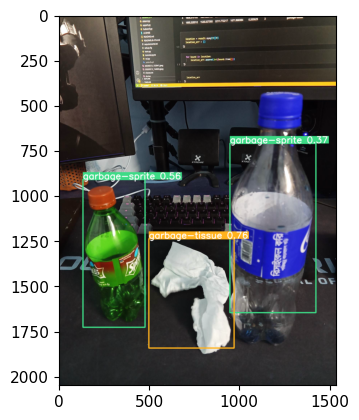

In [36]:
%matplotlib inline 
plt.imshow(np.squeeze(result.render()))
plt.show()

In [46]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model01(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [37]:
result.pandas().xyxy[0]

,xmin,ymin,xmax,ymax,confidence,class,name
0,496.776459,1238.413574,967.096985,1843.065674,0.762312,3,garbage-tissue
1,132.270111,910.853699,475.999115,1728.894897,0.564230,7,garbage-sprite
2,944.158691,710.446594,1419.141479,1647.469116,0.374033,7,garbage-sprite


In [38]:
location = result.xyxy[0][0]
location_arr = []

In [39]:
for bound in location:
    location_arr.append(int(bound.item()))

In [40]:
location_arr

[496, 1238, 967, 1843, 0, 3]

In [41]:
location_arr = location_arr[:4]

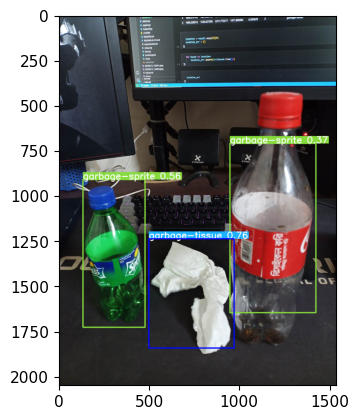

In [42]:
ncopy_img  = image.copy()
cv2.rectangle(ncopy_img, (location_arr[0], location_arr[1]), (location_arr[2], location_arr[3]), (255,0,0), 5)

%matplotlib inline 

plt.imshow(cv2.cvtColor(ncopy_img, cv2.COLOR_BGR2RGB))